# Laporan Project UAS Machine Learning

Adi Christian C14210091\
Meike Surajiman C14210116\
Steven Adrian Gracia C14210171


In [1]:
# libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Dense, Dropout, Flatten 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import initializers
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import time
print("aman")


aman


## Pengenalan dataset
Dataset yang kami pakai adalah [MNIST](http://yann.lecun.com/exdb/mnist/) . Dataset ini berisi beberapa gambar angka yang ditulis tangan. Dataset ini memberikan kesempatan bagi algoritma machine learning untuk mengidentifikasi digit yang benar dari gambar-gambar tersebut. Dataset yang kami gunakan berasal langsung dari keras.

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Data Preprocessing
Ada beberapa hal yang perlu dilakukan sebelum memproses dataset tersebut, diantaranya:
1. Normalisasi
2. Reshape
3. Label encoding
4. Train-test split

1. Data yang dimuat berada di range 0 sampai 255. Supaya CNN konvergen lebih cepat, bisa dilakukan normalisasi.

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

2. Array X akan lebih mudah divisualisasi jika direshape sebagai "gambar" dengan height dan width 28px beserta grayscalenya.

In [4]:
train_images = train_images.reshape((-1,28,28,1)).astype("float32")
test_images = test_images.reshape((-1,28,28,1)).astype("float32")
print(train_images.shape)

(60000, 28, 28, 1)


3. Karena y (label tiap gambar) tidak memiliki relasi ordinal, maka dilakukan one-hot encoding sehingga hasil dari CNN tidak terpengaruh selisih angka.

In [5]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels.shape)

(60000, 10)


4. Split data untuk train dan test

In [6]:
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.1, random_state=42
)
print(train_images.shape, val_images.shape)

(54000, 28, 28, 1) (6000, 28, 28, 1)


Contoh visualisasi

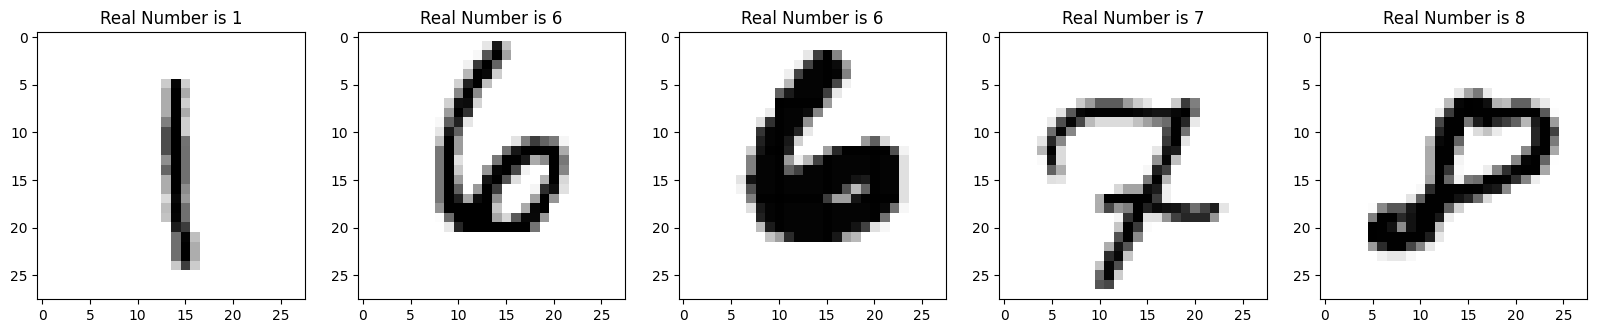

In [7]:
temp = train_images.reshape(train_images.shape[0], 28, 28)

fig, axis = plt.subplots(1, 5, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(temp[i], cmap='binary')
    digit = train_labels[i].argmax()
    ax.set(title = f"Real Number is {digit}");

Untuk menghindari overfitting, dataset yang sudah ada diperluas dengan menggunakan data augmentation. Caranya adalah memberi sedikit variasi untuk setiap data dengan cara memperbesar/kecil, mengubah tempat, dll.

In [8]:
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False, 
        featurewise_std_normalization=False,
        samplewise_std_normalization=False, 
        zca_whitening=False,  
        rotation_range=15,  
        zoom_range = 0.1, 
        width_shift_range=0.1, 
        height_shift_range=0.1, 
        horizontal_flip=False,  
        vertical_flip=False)  
# akan digunakan saat fitting nanti

## Metode CNN: AlexNet
AlexNet adalah sebuah arsitektur CNN yang cukup simpel. Di sini akan diimplementasikan Alexnet dari awal menggunakan Keras Sequential API dengan cara menumpuk layer CNN satu sama lain.
Ada beberapa jenis layer CNN di AlexNet:
- Convolutional layer: sebuah perkalian dot product antara 2 elemen, berisi operasi convolutional antara filter dan image
- Batch Normalisation layer: layer tambahan yang menstandarisasi dan menormalisasi nilai input
- Max Pooling layer: mencari nilai max dari sebuah range sebagai output
- Flatten layer: mengubah image menjadi array 1D
- Dense layer: berisi banyak neuron

In [9]:
# early stopping untuk berhenti dahulu jika sudah fit
es = EarlyStopping(
    monitor='val_accuracy', 
    patience=3, 
    verbose=1,
    mode="max",
    restore_best_weights=True)

In [10]:
model=Sequential()
 
model.add(Conv2D(filters=64, kernel_size = (3,3), strides=(1,1), activation="relu", kernel_initializer='glorot_uniform', input_shape=(28,28,1)))
model.add(BatchNormalization()) 
model.add(Conv2D(filters=64, kernel_size = (3,3), strides=(1,1), activation="relu", kernel_initializer='glorot_uniform', input_shape=(28,28,1)))
model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dense(10,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        256       
 chNormalization)                                                
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dense (Dense)               (None, 10)              

In [11]:
start_time = time.time()
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    epochs=5,
    validation_data=(val_images, val_labels),
    callbacks=[es])
duration = time.time()-start_time

Epoch 1/5


844/844 [==============================] - 31s 36ms/step - loss: 0.6748 - accuracy: 0.8851 - val_loss: 0.1612 - val_accuracy: 0.9572
Epoch 2/5
844/844 [==============================] - 29s 35ms/step - loss: 0.2102 - accuracy: 0.9506 - val_loss: 0.1419 - val_accuracy: 0.9662
Epoch 3/5
844/844 [==============================] - 30s 35ms/step - loss: 0.1518 - accuracy: 0.9622 - val_loss: 0.0964 - val_accuracy: 0.9742
Epoch 4/5
844/844 [==============================] - 30s 35ms/step - loss: 0.1297 - accuracy: 0.9653 - val_loss: 0.1407 - val_accuracy: 0.9657
Epoch 5/5
844/844 [==============================] - 30s 35ms/step - loss: 0.1034 - accuracy: 0.9712 - val_loss: 0.0622 - val_accuracy: 0.9848


In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_error = 1.0 - test_acc

313/313 [==============================] - 2s 6ms/step - loss: 0.0682 - accuracy: 0.9807


In [13]:
print(f"Train error: {(1.0 - history.history['accuracy'][-1]) * 100:.2f}%\nTest error: {test_error * 100:.2f}%\nDuration: {duration:.2f} seconds")

Train error: 2.88%
Test error: 1.93%
Duration: 149.24 seconds


In [14]:
results = []
results.append({
    "Configuration": "model",
    "Train Error": f"{(1.0 - history.history['accuracy'][-1]) * 100:.2f}%",
    "Test Error": f"{test_error * 100:.2f}%",
    "Duration(seconds)": f"{duration:.2f}"
})

## Konfigurasi parameter CNN
Kami mencoba beberapa konfigurasi parameter di CNN. Diantaranya:
- Batch Size
- Kernel Initializer (HE/Glorot)
- Jumlah hidden layer
- Jumlah channels hidden layer
- Kernel size hidden layer
- Stride hidden layer
- Activation function hidden layer
- Jumlah neuron output layer
- Activation function output layer
- Loss function
- Regularization
- Max pooling


Data yang kami dapatkan sebagai berikut dengan implementasi di bawahnya
| CONFIGURATION | LAYERS | REGULARIZATION | TRAIN ERROR | TEST ERROR | DURATION(seconds) |
|---------------|--------|----------------|-------------|------------|----------|
| Model         |Batch=64, Epoch=5,<br>C64x28x28,K=3,S=2,ReLu,Glorot<br>C64x28x28,K=3,S=2,ReLu,Glorot<br>F10,softmax,cross-entropy loss||%|%||
| Conf1         |Batch=32, Epoch=5,<br>C64x28x28,K=3,S=2,ReLu,Glorot<br>C64x28x28,K=3,S=2,ReLu,Glorot<br>F10,softmax,cross-entropy loss||%|%||
| Conf2         |Batch=128, Epoch=5,<br>C64x28x28,K=3,S=2,ReLu,Glorot<br>C64x28x28,K=3,S=2,ReLu,Glorot<br>F10,softmax,cross-entropy loss||%|%||
| Conf3         |Batch=64, Epoch=3,<br>C64x28x28,K=3,S=2,ReLu,Glorot<br>C64x28x28,K=3,S=2,ReLu,Glorot<br>F10,softmax,cross-entropy loss||%|%||
| Conf4         |Batch=64, Epoch=10,<br>C64x28x28,K=3,S=2,ReLu,Glorot<br>C64x28x28,K=3,S=2,ReLu,Glorot<br>F10,softmax,cross-entropy loss||%|%||
| Conf5         |Batch=64, Epoch=5,<br>C64x28x28,K=3,S=2,ReLu,HE<br>C64x28x28,K=3,S=2,ReLu,HE<br>F10,softmax,cross-entropy loss||%|%||
| Conf6         |Batch=64, Epoch=5,<br>C64x28x28,K=3,S=2,ReLu,Glorot<br>C64x28x28,K=3,S=2,ReLu,Glorot<br>C64x28x28,K=3,S=2,ReLu,Glorot<br>F10,softmax,cross-entropy loss||%|%||
| Conf7         |Batch=64, Epoch=5,<br>C32x28x28,K=3,S=2,ReLu,Glorot<br>C32x28x28,K=3,S=2,ReLu,Glorot<br>F10,softmax,cross-entropy loss||%|%||
| Conf8         |Batch=64, Epoch=5,<br>C128x28x28,K=3,S=2,ReLu,Glorot<br>C128x28x28,K=3,S=2,ReLu,Glorot<br>F10,softmax,cross-entropy loss||%|%||
| Conf9         |Batch=64, Epoch=5,<br>C128x28x28,K=1,S=2,ReLu,Glorot<br>C128x28x28,K=1,S=2,ReLu,Glorot<br>F10,softmax,cross-entropy loss||%|%||
| Conf10        |Batch=64, Epoch=5,<br>C128x28x28,K=5,S=2,ReLu,Glorot<br>C128x28x28,K=5,S=2,ReLu,Glorot<br>F10,softmax,cross-entropy loss||%|%||

Dari data yang kami dapatkan, konfigurasi yang terbaik adalah ConfXX dengan train error XX% dan test error XX%

In [15]:
conf1=Sequential()
 
conf1.add(Conv2D(filters=64, kernel_size = (3,3), strides=(1,1), activation="relu", kernel_initializer='glorot_uniform', input_shape=(28,28,1)))
conf1.add(BatchNormalization())
conf1.add(Conv2D(filters=64, kernel_size = (3,3), strides=(1,1), activation="relu", kernel_initializer='glorot_uniform'))
conf1.add(BatchNormalization())
    
conf1.add(Flatten())
conf1.add(Dense(10,activation="softmax"))
    
conf1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start_time = time.time()
history = conf1.fit(
    datagen.flow(train_images, train_labels, batch_size=32),
    epochs=5,
    validation_data=(val_images, val_labels),
    callbacks=[es])
duration = time.time()-start_time

test_loss, test_acc = conf1.evaluate(test_images, test_labels)
test_error = 1.0 - test_acc

results.append({
    "Configuration": "conf1",
    "Train Error": f"{(1.0 - history.history['accuracy'][-1]) * 100:.2f}%",
    "Test Error": f"{test_error * 100:.2f}%",
    "Duration(seconds)": f"{duration:.2f}"
})
print(f"Train error: {(1.0 - history.history['accuracy'][-1]) * 100:.2f}%\nTest error: {test_error * 100:.2f}%\nDuration: {duration:.2f} seconds")

Epoch 1/5
1688/1688 [==============================] - 32s 18ms/step - loss: 0.7965 - accuracy: 0.8840 - val_loss: 0.2565 - val_accuracy: 0.9397
Epoch 2/5
1688/1688 [==============================] - 32s 19ms/step - loss: 0.2154 - accuracy: 0.9490 - val_loss: 0.1070 - val_accuracy: 0.9658
Epoch 3/5
1688/1688 [==============================] - 30s 18ms/step - loss: 0.1463 - accuracy: 0.9604 - val_loss: 0.0727 - val_accuracy: 0.9792
Epoch 4/5
1688/1688 [==============================] - 30s 18ms/step - loss: 0.1068 - accuracy: 0.9693 - val_loss: 0.0672 - val_accuracy: 0.9807
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.0460 - accuracy: 0.9854
Train error: 2.84%
Test error: 1.46%
Duration: 155.76 seconds


In [16]:
conf2=Sequential()
 
conf2.add(Conv2D(filters=64, kernel_size = (3,3), strides=(1,1), activation="relu", kernel_initializer='glorot_uniform', input_shape=(28,28,1)))
conf2.add(BatchNormalization())
conf2.add(Conv2D(filters=64, kernel_size = (3,3), strides=(1,1), activation="relu", kernel_initializer='glorot_uniform'))
conf2.add(BatchNormalization())
    
conf2.add(Flatten())
conf2.add(Dense(10,activation="softmax"))
    
conf2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start_time = time.time()
history = conf2.fit(
    datagen.flow(train_images, train_labels, batch_size=128),
    epochs=5,
    validation_data=(val_images, val_labels),
    callbacks=[es])
duration = time.time()-start_time

test_loss, test_acc = conf2.evaluate(test_images, test_labels)
test_error = 1.0 - test_acc

results.append({
    "Configuration": "conf2",
    "Train Error": f"{(1.0 - history.history['accuracy'][-1]) * 100:.2f}%",
    "Test Error": f"{test_error * 100:.2f}%",
    "Duration(seconds)": f"{duration:.2f}"
})
print(f"Train error: {(1.0 - history.history['accuracy'][-1]) * 100:.2f}%\nTest error: {test_error * 100:.2f}%\nDuration: {duration:.2f} seconds")

Epoch 1/5
422/422 [==============================] - 30s 70ms/step - loss: 0.6879 - accuracy: 0.8767 - val_loss: 3.0191 - val_accuracy: 0.3137
Epoch 2/5
422/422 [==============================] - 29s 68ms/step - loss: 0.2685 - accuracy: 0.9462 - val_loss: 0.1976 - val_accuracy: 0.9537
Epoch 3/5
422/422 [==============================] - 29s 68ms/step - loss: 0.1651 - accuracy: 0.9609 - val_loss: 0.2201 - val_accuracy: 0.9467
Epoch 4/5
422/422 [==============================] - 29s 68ms/step - loss: 0.1376 - accuracy: 0.9647 - val_loss: 0.1379 - val_accuracy: 0.9708
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.1671 - accuracy: 0.9606
Train error: 2.89%
Test error: 3.94%
Duration: 144.78 seconds


In [17]:
conf3=Sequential()
 
conf3.add(Conv2D(filters=64, kernel_size = (3,3), strides=(1,1), activation="relu", kernel_initializer='glorot_uniform', input_shape=(28,28,1)))
conf3.add(BatchNormalization())
conf3.add(Conv2D(filters=64, kernel_size = (3,3), strides=(1,1), activation="relu", kernel_initializer='glorot_uniform'))
conf3.add(BatchNormalization())
    
conf3.add(Flatten())
conf3.add(Dense(10,activation="softmax"))
    
conf3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start_time = time.time()
history = conf3.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    epochs=3,
    validation_data=(val_images, val_labels),
    callbacks=[es])
duration = time.time()-start_time

test_loss, test_acc = conf3.evaluate(test_images, test_labels)
test_error = 1.0 - test_acc

results.append({
    "Configuration": "conf3",
    "Train Error": f"{(1.0 - history.history['accuracy'][-1]) * 100:.2f}%",
    "Test Error": f"{test_error * 100:.2f}%",
    "Duration(seconds)": f"{duration:.2f}"
})
print(f"Train error: {(1.0 - history.history['accuracy'][-1]) * 100:.2f}%\nTest error: {test_error * 100:.2f}%\nDuration: {duration:.2f} seconds")

Epoch 1/3
844/844 [==============================] - 32s 37ms/step - loss: 0.7514 - accuracy: 0.8801 - val_loss: 1.0666 - val_accuracy: 0.8098
Epoch 2/3
844/844 [==============================] - 31s 36ms/step - loss: 0.2274 - accuracy: 0.9481 - val_loss: 0.1739 - val_accuracy: 0.9598
Epoch 3/3
313/313 [==============================] - 2s 7ms/step - loss: 0.2572 - accuracy: 0.9343
Train error: 4.00%
Test error: 6.57%
Duration: 95.11 seconds


In [18]:
conf4=Sequential()
 
conf4.add(Conv2D(filters=64, kernel_size = (3,3), strides=(1,1), activation="relu", kernel_initializer='glorot_uniform', input_shape=(28,28,1)))
conf4.add(BatchNormalization())
conf4.add(Conv2D(filters=64, kernel_size = (3,3), strides=(1,1), activation="relu", kernel_initializer='glorot_uniform'))
conf4.add(BatchNormalization())
    
conf4.add(Flatten())
conf4.add(Dense(10,activation="softmax"))
    
conf4.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start_time = time.time()
history = conf4.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    epochs=10,
    validation_data=(val_images, val_labels),
    callbacks=[es])
duration = time.time()-start_time

test_loss, test_acc = conf4.evaluate(test_images, test_labels)
test_error = 1.0 - test_acc

results.append({
    "Configuration": "conf4",
    "Train Error": f"{(1.0 - history.history['accuracy'][-1]) * 100:.2f}%",
    "Test Error": f"{test_error * 100:.2f}%",
    "Duration(seconds)": f"{duration:.2f}"
})
print(f"Train error: {(1.0 - history.history['accuracy'][-1]) * 100:.2f}%\nTest error: {test_error * 100:.2f}%\nDuration: {duration:.2f} seconds")

Epoch 1/10
844/844 [==============================] - 30s 35ms/step - loss: 0.7053 - accuracy: 0.8826 - val_loss: 0.2213 - val_accuracy: 0.9605
Epoch 2/10
844/844 [==============================] - 29s 35ms/step - loss: 0.2247 - accuracy: 0.9474 - val_loss: 0.1470 - val_accuracy: 0.9628
Epoch 3/10
844/844 [==============================] - 31s 36ms/step - loss: 0.1566 - accuracy: 0.9610 - val_loss: 0.1464 - val_accuracy: 0.9662
Epoch 4/10
844/844 [==============================] - 32s 38ms/step - loss: 0.1249 - accuracy: 0.9666 - val_loss: 0.1023 - val_accuracy: 0.9737
Epoch 5/10
844/844 [==============================] - 32s 38ms/step - loss: 0.1034 - accuracy: 0.9709 - val_loss: 0.1295 - val_accuracy: 0.9680
Epoch 6/10
844/844 [==============================] - 32s 38ms/step - loss: 0.0944 - accuracy: 0.9731 - val_loss: 0.0868 - val_accuracy: 0.9768
Epoch 7/10
844/844 [==============================] - 33s 39ms/step - loss: 0.0811 - accuracy: 0.9767 - val_loss: 0.1043 - val_accuracy:

In [19]:
conf5=Sequential()
 
conf5.add(Conv2D(filters=64, kernel_size = (3,3), strides=(1,1), activation="relu", kernel_initializer='he_uniform', input_shape=(28,28,1)))
conf5.add(BatchNormalization())
conf5.add(Conv2D(filters=64, kernel_size = (3,3), strides=(1,1), activation="relu", kernel_initializer='he_uniform'))
conf5.add(BatchNormalization())
    
conf5.add(Flatten())
conf5.add(Dense(10,activation="softmax"))
    
conf5.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start_time = time.time()
history = conf5.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    epochs=5,
    validation_data=(val_images, val_labels),
    callbacks=[es])
duration = time.time()-start_time

test_loss, test_acc = conf5.evaluate(test_images, test_labels)
test_error = 1.0 - test_acc

results.append({
    "Configuration": "conf5",
    "Train Error": f"{(1.0 - history.history['accuracy'][-1]) * 100:.2f}%",
    "Test Error": f"{test_error * 100:.2f}%",
    "Duration(seconds)": f"{duration:.2f}"
})
print(f"Train error: {(1.0 - history.history['accuracy'][-1]) * 100:.2f}%\nTest error: {test_error * 100:.2f}%\nDuration: {duration:.2f} seconds")

Epoch 1/5
844/844 [==============================] - 32s 37ms/step - loss: 0.7977 - accuracy: 0.8863 - val_loss: 0.3437 - val_accuracy: 0.9503
Epoch 2/5
844/844 [==============================] - 31s 37ms/step - loss: 0.3016 - accuracy: 0.9479 - val_loss: 0.2333 - val_accuracy: 0.9580
Epoch 3/5
844/844 [==============================] - 30s 35ms/step - loss: 0.1941 - accuracy: 0.9609 - val_loss: 0.1408 - val_accuracy: 0.9732
Epoch 4/5
844/844 [==============================] - 30s 35ms/step - loss: 0.1379 - accuracy: 0.9674 - val_loss: 0.0937 - val_accuracy: 0.9785
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.0685 - accuracy: 0.9811
Train error: 2.77%
Test error: 1.89%
Duration: 152.13 seconds


In [20]:
conf6=Sequential()
 
conf6.add(Conv2D(filters=64, kernel_size = (3,3), strides=(1,1), activation="relu", kernel_initializer='glorot_uniform', input_shape=(28,28,1)))
conf6.add(BatchNormalization())
conf6.add(Conv2D(filters=64, kernel_size = (3,3), strides=(1,1), activation="relu", kernel_initializer='glorot_uniform', input_shape=(28,28,1)))
conf6.add(BatchNormalization())
conf6.add(Conv2D(filters=64, kernel_size = (3,3), strides=(1,1), activation="relu", kernel_initializer='glorot_uniform'))
conf6.add(BatchNormalization())
    
conf6.add(Flatten())
conf6.add(Dense(10,activation="softmax"))
    
conf6.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start_time = time.time()
history = conf6.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    epochs=5,
    validation_data=(val_images, val_labels),
    callbacks=[es])
duration = time.time()-start_time

test_loss, test_acc = conf6.evaluate(test_images, test_labels)
test_error = 1.0 - test_acc

results.append({
    "Configuration": "conf6",
    "Train Error": f"{(1.0 - history.history['accuracy'][-1]) * 100:.2f}%",
    "Test Error": f"{test_error * 100:.2f}%",
    "Duration(seconds)": f"{duration:.2f}"
})
print(f"Train error: {(1.0 - history.history['accuracy'][-1]) * 100:.2f}%\nTest error: {test_error * 100:.2f}%\nDuration: {duration:.2f} seconds")

Epoch 1/5
844/844 [==============================] - 53s 62ms/step - loss: 0.7125 - accuracy: 0.8965 - val_loss: 0.2344 - val_accuracy: 0.9612
Epoch 2/5
844/844 [==============================] - 48s 57ms/step - loss: 0.3166 - accuracy: 0.9543 - val_loss: 0.1580 - val_accuracy: 0.9730
Epoch 3/5
844/844 [==============================] - 46s 54ms/step - loss: 0.2027 - accuracy: 0.9655 - val_loss: 0.1238 - val_accuracy: 0.9753
Epoch 4/5
844/844 [==============================] - 49s 58ms/step - loss: 0.1426 - accuracy: 0.9706 - val_loss: 0.0697 - val_accuracy: 0.9848
Epoch 5/5
313/313 [==============================] - 3s 11ms/step - loss: 0.0778 - accuracy: 0.9813
Train error: 2.48%
Test error: 1.87%
Duration: 247.18 seconds


In [21]:
conf7=Sequential()
 
conf7.add(Conv2D(filters=32, kernel_size = (3,3), strides=(1,1), activation="relu", kernel_initializer='glorot_uniform', input_shape=(28,28,1)))
conf7.add(BatchNormalization())
conf7.add(Conv2D(filters=32, kernel_size = (3,3), strides=(1,1), activation="relu", kernel_initializer='glorot_uniform'))
conf7.add(BatchNormalization())
    
conf7.add(Flatten())
conf7.add(Dense(10,activation="softmax"))
    
conf7.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start_time = time.time()
history = conf7.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    epochs=5,
    validation_data=(val_images, val_labels),
    callbacks=[es])
duration = time.time()-start_time

test_loss, test_acc = conf7.evaluate(test_images, test_labels)
test_error = 1.0 - test_acc

results.append({
    "Configuration": "conf7",
    "Train Error": f"{(1.0 - history.history['accuracy'][-1]) * 100:.2f}%",
    "Test Error": f"{test_error * 100:.2f}%",
    "Duration(seconds)": f"{duration:.2f}"
})
print(f"Train error: {(1.0 - history.history['accuracy'][-1]) * 100:.2f}%\nTest error: {test_error * 100:.2f}%\nDuration: {duration:.2f} seconds")

Epoch 1/5
844/844 [==============================] - 16s 18ms/step - loss: 0.4499 - accuracy: 0.8898 - val_loss: 0.2224 - val_accuracy: 0.9387
Epoch 2/5
844/844 [==============================] - 15s 17ms/step - loss: 0.1797 - accuracy: 0.9515 - val_loss: 0.0984 - val_accuracy: 0.9745
Epoch 3/5
844/844 [==============================] - 17s 20ms/step - loss: 0.1403 - accuracy: 0.9615 - val_loss: 0.1039 - val_accuracy: 0.9682
Epoch 4/5
844/844 [==============================] - 15s 18ms/step - loss: 0.1125 - accuracy: 0.9671 - val_loss: 0.1218 - val_accuracy: 0.9677
Epoch 5/5
844/844 [==============================] - 16s 19ms/step - loss: 0.0973 - accuracy: 0.9717 - val_loss: 0.0894 - val_accuracy: 0.9733
Epoch 5: early stopping
313/313 [==============================] - 1s 3ms/step - loss: 0.0903 - accuracy: 0.9749
Train error: 2.83%
Test error: 2.51%
Duration: 79.38 seconds


In [22]:
conf8=Sequential()
 
conf8.add(Conv2D(filters=128, kernel_size = (3,3), strides=(1,1), activation="relu", kernel_initializer='glorot_uniform', input_shape=(28,28,1)))
conf8.add(BatchNormalization())
conf8.add(Conv2D(filters=128, kernel_size = (3,3), strides=(1,1), activation="relu", kernel_initializer='glorot_uniform'))
conf8.add(BatchNormalization())
    
conf8.add(Flatten())
conf8.add(Dense(10,activation="softmax"))
    
conf8.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start_time = time.time()
history = conf8.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    epochs=5,
    validation_data=(val_images, val_labels),
    callbacks=[es])
duration = time.time()-start_time

test_loss, test_acc = conf8.evaluate(test_images, test_labels)
test_error = 1.0 - test_acc

results.append({
    "Configuration": "conf8",
    "Train Error": f"{(1.0 - history.history['accuracy'][-1]) * 100:.2f}%",
    "Test Error": f"{test_error * 100:.2f}%",
    "Duration(seconds)": f"{duration:.2f}"
})
print(f"Train error: {(1.0 - history.history['accuracy'][-1]) * 100:.2f}%\nTest error: {test_error * 100:.2f}%\nDuration: {duration:.2f} seconds")

Epoch 1/5
844/844 [==============================] - 100s 117ms/step - loss: 0.9926 - accuracy: 0.8837 - val_loss: 0.1163 - val_accuracy: 0.9693
Epoch 2/5
844/844 [==============================] - 96s 113ms/step - loss: 0.2018 - accuracy: 0.9508 - val_loss: 0.1470 - val_accuracy: 0.9653
Epoch 3/5
844/844 [==============================] - 95s 113ms/step - loss: 0.1533 - accuracy: 0.9610 - val_loss: 0.1124 - val_accuracy: 0.9733
Epoch 4/5
844/844 [==============================] - 101s 120ms/step - loss: 0.1234 - accuracy: 0.9673 - val_loss: 0.1075 - val_accuracy: 0.9720
Epoch 5/5
313/313 [==============================] - 5s 17ms/step - loss: 0.0567 - accuracy: 0.9842
Train error: 2.82%
Test error: 1.58%
Duration: 488.70 seconds


In [23]:
conf9=Sequential()
 
conf9.add(Conv2D(filters=64, kernel_size = (1,1), strides=(1,1), activation="relu", kernel_initializer='glorot_uniform', input_shape=(28,28,1)))
conf9.add(BatchNormalization())
conf9.add(Conv2D(filters=64, kernel_size = (1,1), strides=(1,1), activation="relu", kernel_initializer='glorot_uniform'))
conf9.add(BatchNormalization())
    
conf9.add(Flatten())
conf9.add(Dense(10,activation="softmax"))
    
conf9.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start_time = time.time()
history = conf9.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    epochs=5,
    validation_data=(val_images, val_labels),
    callbacks=[es])
duration = time.time()-start_time

test_loss, test_acc = conf9.evaluate(test_images, test_labels)
test_error = 1.0 - test_acc

results.append({
    "Configuration": "conf9",
    "Train Error": f"{(1.0 - history.history['accuracy'][-1]) * 100:.2f}%",
    "Test Error": f"{test_error * 100:.2f}%",
    "Duration(seconds)": f"{duration:.2f}"
})
print(f"Train error: {(1.0 - history.history['accuracy'][-1]) * 100:.2f}%\nTest error: {test_error * 100:.2f}%\nDuration: {duration:.2f} seconds")

Epoch 1/5
844/844 [==============================] - 25s 29ms/step - loss: 1.1364 - accuracy: 0.6726 - val_loss: 1.7856 - val_accuracy: 0.5093
Epoch 2/5
844/844 [==============================] - 23s 27ms/step - loss: 0.8952 - accuracy: 0.7235 - val_loss: 6.1027 - val_accuracy: 0.2572
Epoch 3/5
844/844 [==============================] - 24s 29ms/step - loss: 0.8588 - accuracy: 0.7346 - val_loss: 6.9699 - val_accuracy: 0.2103
Epoch 4/5
844/844 [==============================] - 21s 25ms/step - loss: 0.8310 - accuracy: 0.7470 - val_loss: 8.6637 - val_accuracy: 0.1743
Epoch 4: early stopping
313/313 [==============================] - 1s 3ms/step - loss: 1.6688 - accuracy: 0.5261
Train error: 25.30%
Test error: 47.39%
Duration: 93.74 seconds


In [24]:
conf10=Sequential()
 
conf10.add(Conv2D(filters=64, kernel_size = (5,5), strides=(1,1), activation="relu", kernel_initializer='glorot_uniform', input_shape=(28,28,1)))
conf10.add(BatchNormalization())
conf10.add(Conv2D(filters=64, kernel_size = (5,5), strides=(1,1), activation="relu", kernel_initializer='glorot_uniform'))
conf10.add(BatchNormalization())
    
conf10.add(Flatten())
conf10.add(Dense(10,activation="softmax"))
    
conf10.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start_time = time.time()
history = conf10.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    epochs=5,
    validation_data=(val_images, val_labels),
    callbacks=[es])
duration = time.time()-start_time

test_loss, test_acc = conf10.evaluate(test_images, test_labels)
test_error = 1.0 - test_acc

results.append({
    "Configuration": "conf10",
    "Train Error": f"{(1.0 - history.history['accuracy'][-1]) * 100:.2f}%",
    "Test Error": f"{test_error * 100:.2f}%",
    "Duration(seconds)": f"{duration:.2f}"
})
print(f"Train error: {(1.0 - history.history['accuracy'][-1]) * 100:.2f}%\nTest error: {test_error * 100:.2f}%\nDuration: {duration:.2f} seconds")

Epoch 1/5
844/844 [==============================] - 42s 49ms/step - loss: 0.5447 - accuracy: 0.9042 - val_loss: 0.2192 - val_accuracy: 0.9607
Epoch 2/5
844/844 [==============================] - 42s 50ms/step - loss: 0.2084 - accuracy: 0.9599 - val_loss: 0.0891 - val_accuracy: 0.9827
Epoch 3/5
844/844 [==============================] - 41s 49ms/step - loss: 0.1537 - accuracy: 0.9686 - val_loss: 0.1107 - val_accuracy: 0.9775
Epoch 4/5
844/844 [==============================] - 42s 49ms/step - loss: 0.1150 - accuracy: 0.9744 - val_loss: 0.0977 - val_accuracy: 0.9798
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.0590 - accuracy: 0.9847
Train error: 2.49%
Test error: 1.53%
Duration: 214.04 seconds


In [25]:
df = pd.DataFrame(results)
print(df)

   Configuration Train Error Test Error Duration(seconds)
0          model       2.88%      1.93%            149.24
1          conf1       2.84%      1.46%            155.76
2          conf2       2.89%      3.94%            144.78
3          conf3       4.00%      6.57%             95.11
4          conf4       2.12%      1.88%            280.47
5          conf5       2.77%      1.89%            152.13
6          conf6       2.48%      1.87%            247.18
7          conf7       2.83%      2.51%             79.38
8          conf8       2.82%      1.58%            488.70
9          conf9      25.30%     47.39%             93.74
10        conf10       2.49%      1.53%            214.04


## Daftar Referensi
1. https://paperswithcode.com/datasets?task=image-classification
2. https://keras.io/api/datasets/mnist/
3. https://www.kaggle.com/code/vortexkol/alexnet-cnn-architecture-on-tensorflow-beginner
4. https://keras.io/layers/core/
5. https://keras.io/layers/convolutional/
6. https://keras.io/layers/pooling/
7. https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6
8. https://keras.io/api/callbacks/early_stopping/